DEVOIR MAISON 2

---
# Splines cubiques
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**IMPORTANT** 
> 1. Dans ce DM on demande d'essayer d'éviter l'utilisation de boucles `for` dans *les définitions de fonctions*. Une solution utilisant des commandes vectorielles (commandes de `numpy`) apportera plus de points qu'une solution utilisant des boucles `for`.
> 2. Tout graphique doit avoir un titre et une légende.

L'un des problèmes d'approximation d'une fonction par son polynome interpolateur de Lagrange est le phénomène de Runge: le fait que le polynome interpolateur ne tend pas forcément vers la fonction interpolée quand le nombre de points d'interpolation augmente. L'une des solutions possibles à ce problème est la segmentation: on approche la fonction par des fonctions polynomiales *par morceaux*. Dans ce cas, pour améliorer l'approximation on augmente le nombre de morceaux et non le dégré des polynomes. Ceci est l'idée des *splines*.

## Définition
On considère sur un segment $ [ a, b ] $ une division $ a = x_0 < x_1 < \ldots < x_N = b $ définie par $ N + 1 $ points $ x_0, x_1, x_2, \ldots, x_N $. Une fonction $ s : [ a, b ] \to \mathbb{R} $ est appelée *spline* cubique relative aux noeuds $ x_i $ si 
- $ s $ est une fonction $ C^2 $ sur $ [a, b ] $: $ s \in C^2( [ a, b ] ) $ et
- sur chaque intervalle $ [ x_{ i }, x_{i+1} ] $ la fonction $ s $ est un polynome de degré $ 3 $: $ s_i \in \mathbb{R}_3[ X ] $, où $ s_i = \left. s \right|_{ [ x_{ i }, x_{i+1} ] } $, $ i = 0, 1, \ldots, N-1 $.

On dit qu'une spline $ s $ est une spline d'interpolation aux points $ ( x_i, y_i ) $, $ i = 0, 1, \ldots, N $, si en plus
- $ s( x_i ) = y_i $, $ i = 0, 1, \ldots, N $.  

## Construction

Dans ce qui suit nous allons utiliser la notation suivante: on dénote $ h_i = x_{ i + 1 } - x_i $, $ i = 0, 1, \ldots, N-1 $, et on appelle différences divisées $ \delta y $ les expressions définies par
\begin{equation*}
\delta y[ x_{ i + 1 }, x_i ] = \frac{ y_{ i + 1 } - y_i }{ x_{ i+1 } - x_i }, \quad i = 0, 1, \ldots, N-1.
\end{equation*}

Pour chaque intervalle $ [ x_{ i }, x_{i+1} ] $, $ i = 0, 1, \ldots, N-1 $, nous allons construire le polynome $ s_i $ ( la restriction de $ s $ sur $ [ x_{ i }, x_{i+1} ] $) comme le polynome de degré 3 vérifiant les conditions
\begin{equation*}
\begin{aligned}
& s_i( x_{ i } ) = y_{ i }, & s_i( x_{i+1} ) = y_{i+1}, \\
& s'_i( x_{ i } ) = p_{ i }, & s'_i( x_{i+1} ) = p_{i+1}, \\
\end{aligned}
\tag{1}
\end{equation*}
avec $ p_0, p_1, \ldots, p_N $ (les pentes) données. On peut montrer que pour tous $ y_{i}, y_{i+1}, p_{i}, p_{i+1} $ il existe unique polynome $ s_i $ de degré 3 vérifiant les 4 conditions (1). Comment choisir les pentes $ p_0, p_1, \ldots, p_N $? On va choisir les valeurs $ p_1, \ldots, p_{N-1} $ de telle sorte que la fonction $ s $ soit $ C^2 $ sur $ [ a, b ] $. Plus particulièrement, il est possible de montrer que pour que $ s_{i-1}''( x_{i} ) = s_{i}''( x_i ) $, $ i = 1, 2, \ldots, N-1 $, il faut que $ p_1, p_2, \ldots, p_{N-1} $ vérifient le système linéaire suivant:

Dans ce DM nous allons étudier les splines dites *scellées*, i.e. nous allons préscire les valeurs de la dérivée de la spline au bord de l'intervalle $ [ a,b ] $.
En d'autres termes nous allons préscrire les valeurs $ p_0 $, $ p_N $. Notamment si on cherche une spline interpolant une fonction $ f $ aux points $ x_0, x_1, \ldots, x_N $, i.e. telle que $ s( x_i ) = f( x_i ) $ pour tout $ i $, alors nous allons imposer les conditions aux bords suivantes
$$
s'_0( a ) = f'( a ), \quad s'_{N}(b) = f'( b ).
$$
Ces conditions nous donnent donc les valeurs des pentes $ p_0 $ et $ p_N $: $ p_0 = f'( a ) $, $ p_N = f'( b ) $. Etant donné les valeurs de $ p_0 $ et $ p_N $ on peut résoudre le système (2) pour trouver les valeurs $ p_1, p_2, \ldots, p_{N-1} $.

**Question 1.** Proposer une fonction `M` qui prend en argument un tableau `x` contenant les valeurs $ x_0, x_1, \ldots, x_{N} $ et qui retourne la matrice du système (2). On essayera d'eviter l'utilisation de boucle. Pour construire une matrice tridiagonale on pourra utiliser la commande `diag` du module `numpy`. Testez votre fonction sur un vecteur `x` contenant peu de points.

In [2]:
def M (x) :
    """
    fonction M qui retourne la matrice du système (2)
    ----
    Paramètre:
    
        x: ndarray
        contenant les valeurs  𝑥0,𝑥1,…,𝑥𝑁
        
    Returns
    -------
    
    ndarray
        matrice du système (2)
    """
    h = x[1:] - x[:-1] 
    M = 2*(np.diag(1/h[:-1] + 1/h[1:])) + np.diag(1/h[:-2],k=-1) + np.diag(1/h[:-2],k=1)
    return M

**Question 2.** Proposer une fonction `sprime` qui prend en argument deux tableaux `x` et `y` de meme taille $ N + 1 $ et deux réels `p0` et `pN` et qui retourne un vecteur de taille $ N - 1 $ des valeurs $ p_1, p_2, \ldots, p_{N-1} $ solution du système (2). On essayera d'eviter l'utilisation de boucle. Pour résoudre un système linéaire on pourra se servir de la commande `solve` du module `numpy.linalg`.

In [3]:
def sprime(x, y, p0, pN):
    """
    fonction sprime qui retourne un vecteur de taille  𝑁−1 solution du système (2)
    ----
    Paramètre:
    
        x: ndarray
        
        y: ndarray
        
    Returns
    -------
    
    ndarray
        tableau contetanant les pi solutions de (2)
    """
    h = x[1:] - x[:-1] 
    
    delta_y = (y[1:] - y[:-1])/h
    
    c = 3 * (delta_y[:-1]/h[:-1] + delta_y[1:]/h[1:])
    c[0] = c[0] - p0/h[0]
    c[-1] = c[-1] - pN/h[-1]
     
    return np.linalg.solve(M(x),c )


Nous nous proposons de construire une interpolation par spline cubique de la fonction $f$ suivante:
$$
f( x ) = \frac{ 1 }{ 1 + x^2 }. 
$$
On va considérer cette fonction sur l'intervalle $ [ -5, 5 ] $.

**Question 3.** 
> 1. Définir la fonction `f` et sa dérivée `fprime`
> 2. Tracer dans une fenetre graphique le graphe de la dérivée de $ f $ sur $ [-5,5] $. Pour tester la fonction `sprime` definir un vecteur `x` de $ N+1 $ points équirepartis entre $ a = -5 $ et $ b =5 $ (on peut prendre $ N = 20 $, par exemple) et construire le vecteur de pentes `p`. Tracer les pentes `p` en fonction de `x` à l'aide de la commande `ax.scatter` *dans la meme fenetre graphique*. Vérifier que les valeurs $p_0, p_1, \ldots, p_N$ fournissent une bonne approximation de la dérivée de $ f $. On peut essayer d'obtenir une figure qui ressemble à celle-ci:
<div>
<img src="sprime.png" width="500"/>
</div>

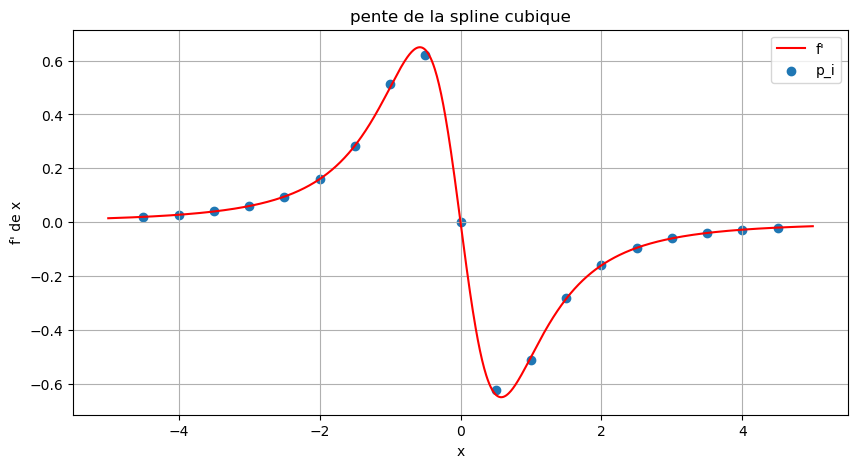

In [4]:
def f (x):
    return 1/(1+x**2)

def f_prime(x):
    return -2*x/((1+x**2)**2)

#Paramètres
xx = np.linspace(-5,5,1000)
x = np.linspace(-5,5,21)
y = f(x)
p0 = f_prime(-5)
pN = f_prime(5)
p_i = sprime(x,y,p0,pN)     # on définit le spline prime pour f

#Tracé de la courbe
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)

ax.plot(xx,f_prime(xx), label = f'f\'',color = 'r')
ax.scatter(x[1:-1],p_i, label = 'p_i')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('f\' de x')
ax.set_title('pente de la spline cubique')
ax.legend()

Après avoir determiné les pentes $ p_0, p_1, \ldots, p_N $ nous allons trouver les expressions explicites pour les polynomes cubiques $ s_i $. Nous supposons que les polynomes cubiques $ s_i $ sont donnés par la formule
$$
s_i( x ) = a_i + b_i ( x - x_i ) + c_i ( x - x_i )^2 + d_i( x - x_i )^3, \quad i = 0, 1, \ldots, N-1.
\tag{3}
$$
**Question 4.** Montrer que si $ s_i $ vérifie (1), alors les coéficients $ a_i, b_i, c_i, d_i $ sont donnés par les formules suivantes pour $ i = 0, 1, \ldots, N-1 $ :
$$
\begin{aligned}
& a_i = y_i, \\
& b_i = p_i, \\
& c_i = \frac{ 3 }{ h_i } \delta y[ x_{ i + 1 }, x_i ] - \frac{ p_{ i + 1 } + 2 p_i }{ h_i } \\
& d_i = \frac{ 1 }{ h_{i}^2 }( p_{i+1} + p_{ i } ) - \frac{ 2 }{ h_{i}^2 } \delta y[ x_{i+1}, x_{i} ].
\end{aligned}
$$

**Réponce à la question 4:**

Soit  $\quad\quad\quad  s_i( x ) = a_i + b_i ( x - x_i ) + c_i ( x - x_i )^2 + d_i( x - x_i )^3, \quad i = 0, 1, \ldots, N-1. $


Alors comme $\space s_i$ vérifie (1). On a:
\begin{equation*}
\begin{aligned}
& s_i( x_{ i } ) = y_{ i }, & s_i( x_{i+1} ) = y_{i+1}, \\
& s'_i( x_{ i } ) = p_{ i }, & s'_i( x_{i+1} ) = p_{i+1}, \\
\end{aligned}
\end{equation*}

>1. Donc $\space s_i$ en $\space x_i$  nous donne : $\quad\quad s_i( x ) = a_i + 0 + 0 + 0 = y_i $

Donc $\space \underline{ a_i = y_i}$ 

>2. Si on dérive, on a: $\quad\quad s_i'( x ) = b_i + 2*c_i ( x - x_i ) + 3*d_i( x - x_i )^2 = p_i $
Encore $\space s_i'$ en $\space x_i$  nous donne : $\quad\quad s_i( x ) = b_i + 0 + 0  = p_i $

D'où $\space \underline{ b_i = p_i}$

>3. Maintenant avec les valeurs obtenues et si on évalue $\space s_i$ en $\space x_{i+1}$ on a :
\begin{equation*}
\begin{aligned}
& s_i( x) = y_i + p_i( x + x_i) + c_i ( x - x_i )^2 + d_i( x - x_i )^3 = y_i,\\
& s_i( x_{i+1}) = y_{i+1} + p_i * h_i + c_i * h_i^2 + d_i * h_i^3 = y_{i+1},\\
& \delta y[ x_{ i + 1 }, x_i ] =  p_i + c_i * h_i + d_i * h_i^2,\\
& \frac {\delta y[ x_{ i + 1 }, x_i ]}{h_i} - \frac{p_i}{h_i} = c_i + d_i * h_i,\\
\end{aligned}
\end{equation*}

>4. De même pour $\space s_i'$ en $\space x_{i+1}$ on a:
\begin{equation*}
\begin{aligned}
& s_i'( x) = p_i( x + x_i) + 2 * c_i ( x - x_i ) + 3 * d_i( x - x_i )^2 = p_i,\\
& s_i'( x_{i+1}) = p_i + 2 * c_i * h_i + 3 * d_i * h_i^2 = p_{i+1},\\
& \frac{p_{i+1} - p_i}{h_i} = 2 * ( c_i + d_i * h_i) + d_i * h_i,\\
& \frac{p_{i+1} - p_i}{h_i} = 2 * (\frac {\delta y[ x_{ i + 1 }, x_i ]}{h_i} - \frac{p_i}{h_i} )+ d_i * h_i,\\
& \frac{p_{i+1} + p_i}{h_i} - 2 * \frac {\delta y[ x_{ i + 1 }, x_i ]}{h_i}  = d_i * h_i,\\
\end{aligned}
\end{equation*}

D'où $\space \underline{ d_i = \frac{ 1 }{ h_{i}^2 }( p_{i+1} + p_{ i } ) - \frac{ 2 }{ h_{i}^2 } \delta y[ x_{i+1}, x_{i}}]$

>5. Enfin si on remplace la valeur de $\space d_i$ dans l'équation $\space s_i'$ pour $\space x_{i+1}$ on a:
\begin{equation*}
\begin{aligned}
& \frac {\delta y[ x_{ i + 1 }, x_i ]}{h_i} - \frac{p_i}{h_i} = c_i + d_i * h_i,\\
& \frac {\delta y[ x_{ i + 1 }, x_i ]}{h_i} - \frac{p_i}{h_i} = c_i + \frac{p_{i+1} + p_i}{h_i} - 2 * \frac {\delta y[ x_{ i + 1 }, x_i ]}{h_i},\\
\end{aligned}
\end{equation*}

D'où $\space \underline{c_i = \frac{ 3 }{ h_i } \delta y[ x_{ i + 1 }, x_i ] - \frac{ p_{ i + 1 } + 2 p_i }{ h_i }}$

>6. En résumer on a bien:
\begin{aligned}
& a_i = y_i, \\
& b_i = p_i, \\
& c_i = \frac{ 3 }{ h_i } \delta y[ x_{ i + 1 }, x_i ] - \frac{ p_{ i + 1 } + 2 p_i }{ h_i } \\
& d_i = \frac{ 1 }{ h_{i}^2 }( p_{i+1} + p_{ i } ) - \frac{ 2 }{ h_{i}^2 } \delta y[ x_{i+1}, x_{i} ].
\end{aligned}

**Question 5.** Programmer une fonction `splines` qui prend en argument un `ndarray` `x` et un `ndarray` `y` de meme taille $ N + 1 $ et deux réels `p0` et `pN` et qui retourne un tableau `S` de taille $ ( N, 4 ) $ tel que la $i$-ème ligne de $ S $ contient les valeurs $ a_i, b_i, c_i, d_i $. (On essayera d'éviter l'utilisation de boucle.)

In [5]:
def splines (x, y, p0, pN):
    """
    fonction splines qui retourne un tableau S de taille  (𝑁,4) tel que la  𝑖-ème ligne de  𝑆
    contient les valeurs  𝑎𝑖,𝑏𝑖,𝑐𝑖,𝑑𝑖
    ----
    Paramètre:
    
        x: ndarray
        
        y: ndarray
        
        p0: real
            premier terme de la liste pi
        
        pN: real
            dernier terme de la liste pi
        
    Returns
    -------
    
    ndarray
        tableau S de taille  (𝑁,4) qui contient les valeurs  𝑎𝑖,𝑏𝑖,𝑐𝑖,𝑑𝑖
    """
    N = x.size
    h = x[1:] - x[:-1] 
    
    delta_y = (y[1:] - y[:-1])/h
    
    a = y
    
    b = np.zeros(N)
    b[0],b[-2] = p0,pN
    b[1:-1] =  sprime(x,y,p0,pN)
    
    c = ((3/h) * delta_y) - ((b[1:] + 2*b[:-1]) / h)
    d = ((1/h**2) * (b[1:] + b[:-1])) - ((2/h**2) * delta_y)
    
    S = np.transpose([a[:-1],b[:-1],c,d])
    return S

**Question 6.** Dans cette question nous allons tester la fonction `splines`
> 1. Créer un vecteur `x` de $ N + 1 $ points equirepartis entre $a = -5 $ et $ b = 5 $ et un vecteur `y` de $ N + 1 $ points aléatoires entre $ 0 $ et $ 1 $ (on pourra prendre $ N = 5 $, par exemple). 
> 2. Construire la spline cubique scellée $ s $ d'interpolation aux points $ (x_i, y_i) $, $ i = 0, 1, \ldots, N$ à l'aide de la fonction `splines`. On pourra prendre $ p_0 = p_N = 0 $ comme valeurs de pente aux bords.
> 3. Tracer le graphe de $ s $ sur $ [ a, b ] $. Ajouter le nuage de points $ (x_i, y_i) $, $ i = 0, 1, \ldots, N $. Vérifier que le graphe de $ s $ passe par les points $ ( x_i, y_i ) $.

Pour tracer le graphe de la spline construite à l'aide de la fonction `splines` pour des points *équirepartis* `x` on pourra utiliser la fonction `spline_eval` définie ci-dessous. Elle prend en argument un vecteur `x` des noeuds de la spline (de taille $N+1$) *équirepartis*, un vecteur `xx` des points où on veut evaluer les valeurs de la spline et un tableau `S` de taille $ (N, 4) $ tel que la $i$-ème ligne de $ S $ contient les coefficients $ a_i, b_i, c_i, d_i $ de la resctriction de la spline à l'intervalle $ [ x[ i ], x[ i + 1 ] ] $ comme définis dans la formule (3). Elle retourne le tableau des valeurs de la spline aux points de `xx`.

In [6]:
def spline_eval( x, xx, S ):
    """
    évalue une spline définie par des noeuds équirepartis
    
    Parameters
    ----------
    
    x: ndarray
        noeuds définissant la spline
        
    xx: ndarray
        abscisses des points d'évaluation
    
    S: ndarray
        de taille (x.size-1, 4)
        tableau dont la i-ème ligne contient les coéficients du polynome cubique qui est la restriction
        de la spline à l'intervalle [x_i, x_{i+1}]
        
    Returns
    -------
    
    ndarray
        ordonnées des points d'évaluation
    """
    ind = ( np.floor( ( xx - x[ 0 ] ) / ( x[ 1 ] - x[ 0 ] ) ) ).astype( int )
    ind = np.where( ind == x.size-1, ind - 1 , ind )
    yy = S[ ind, 0 ] + S[ ind, 1 ] * ( xx - x[ ind ] ) + \
        S[ ind, 2 ] * ( xx - x[ ind ] )**2 + S[ ind, 3 ] * ( xx - x[ ind ] )**3
    return yy

In [7]:
def equirepartis(a, b, N):
    """retourne les N points équirépartis entre a et b"""
    i = np.arange(1, N+1)
    return a + (b-a)/(N-1) * (i-1)

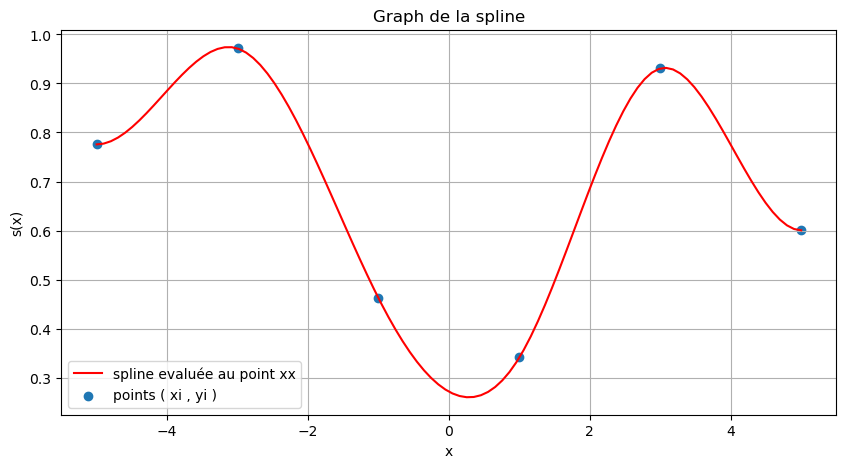

In [8]:
#Paramètres
x = equirepartis(-5,5,6)
y = np.random.rand(6)
xx = np.linspace(-5,5,100)

s = splines(x, y, p0=0, pN=0)   # on définit le spline pour f
S = spline_eval(x,xx,s)         # on l'évalue aux points de xx

#Tracé de la figure
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(xx,S,label='spline evaluée au point xx',color = 'r')
ax.scatter(x,y,label= f'points ( xi , yi )')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('s(x)')
ax.set_title(f'Graph de la spline')
ax.legend()

**Question 7.** Pour chacune des valeurs de $ N = 4, 9, 19 $ créer un vecteur `x` de $ N + 1 $ points équirepartis entre $ a $ et $ b $. Tracer dans la meme fenetre graphique la fonction $ f $ et ses splines cubiques interpolateurs aux noeuds définis par le vecteur `x` pour des différentes valeurs de $ N $. Commenter les résultats obtenus. Comparer avec les résultats de la Question 3 du TP05.

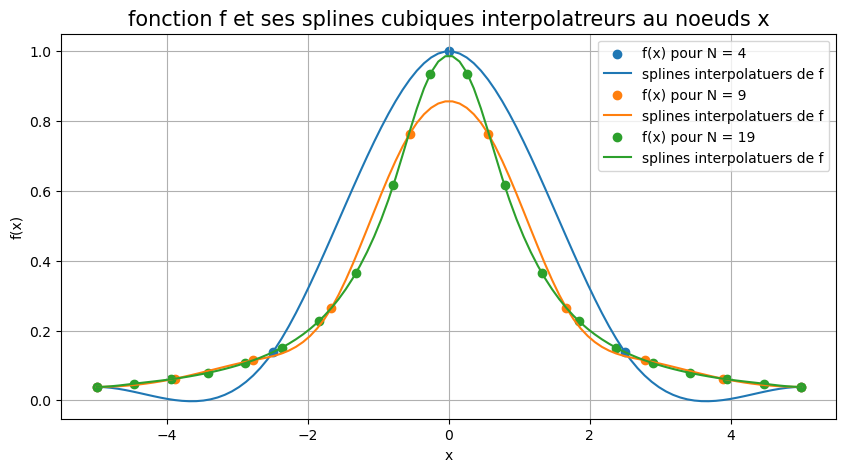

In [9]:
#Bornes
a = -5
b = 5

#Nombre de points
list_N = [4,9,19]

#Tracé du graph
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title(f'fonction f et ses splines cubiques interpolatreurs au noeuds x', fontsize = 15)

#Tracé de la fonction et de ses splines interpolateurs
for N in list_N:
    x = equirepartis(a,b,N+1)
    xx = np.linspace(-5,5,100)
    ax.scatter(x,f(x), label = f'f(x) pour N = {N}')
    ax.plot(xx,spline_eval(x,xx,splines(x, f(x), p0=0, pN=0)), label = f'splines interpolatuers de f')
    ax.legend()

**Réponce à la question :**

Nous obtenons sensiblement la même choses qu'à la quéstion 3 du TP 5 mais nous n'avons plus poblèmes aux bornes de l'intervale [a,b]